# ARMA Models - Lab

## Introduction

In this lab, you'll practice your knowledge the Autoregressive (AR), the Moving Average (MA) model, and the combined ARMA model.

## Objectives

You will be able to:
- Understand and explain what a Autoregressive model is
- Understand and explain what a Moving Average model is
- Understand and apply the mathematical formulations for Autoregressive and Moving Average models
- Understand how AR and MA can be combined in ARMA models

## Generate an AR model of the first order with $\phi = 0.7$

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/envs/learn-env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


Recall that the AR model has the following formula:

$$Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

This means that:

$$Y_1 = \mu + \phi * Y_{0}+\epsilon_1$$
$$Y_2 = \mu + \phi * (\text{mean-centered version of } Y_1) +\epsilon_2$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 2. Make sure you have a daily datetime index ranging from January 2017 until the end of March 2018. Assume that $\mu=5$ and $Y_0= 8$.


In [2]:
# keep the random seed
np.random.seed(11225)

# create a series with the specified dates
date_index = pd.date_range(start='2017-01-01', end='2018-03-31', freq='D')
date_index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2018-03-22', '2018-03-23', '2018-03-24', '2018-03-25',
               '2018-03-26', '2018-03-27', '2018-03-28', '2018-03-29',
               '2018-03-30', '2018-03-31'],
              dtype='datetime64[ns]', length=455, freq='D')

In [5]:
# store the parameters
noises = np.random.normal(loc=0, scale=2, size=len(date_index))
phi = .7
mu = 5
std = 2
y_0 = 8

In [21]:
# generate the time series according to the formula
ar_data = np.zeros(len(date_index))
y = y_0

for i in range(len(date_index)):
    ar_data[i] = mu + phi * y + noises[i]
    y = ar_data[i] - mu

ar_ts = pd.Series(ar_data, index=date_index, name='data')
ar_ts.head()

2017-01-01    13.008794
2017-01-02     8.290869
2017-01-03     8.544932
2017-01-04     3.538470
2017-01-05     7.004262
Freq: D, Name: data, dtype: float64

Plot the time series and verify what you see

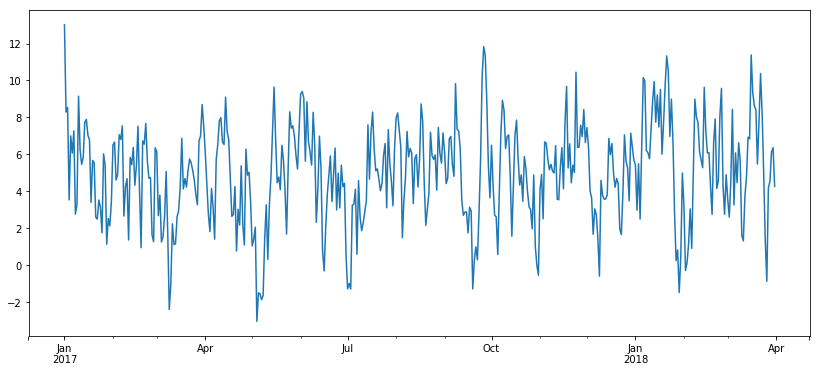

In [22]:
# plot here
ar_ts.plot(figsize=(14,6))

## Look at the ACF and PACF of your model and write down your conclusions

We recommend to use `plot_acf` in statsmodels instead of the pandas ACF variant.

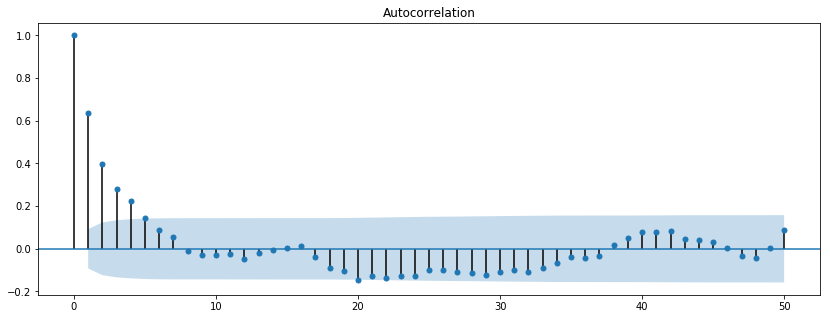

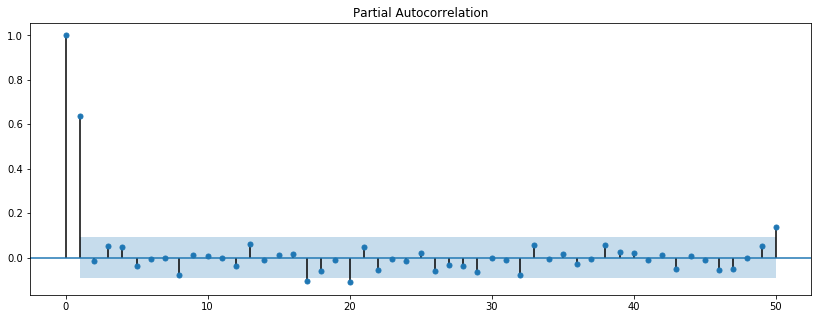

In [23]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_acf(ar_ts, lags=50);
plot_pacf(ar_ts, lags=50);

In [24]:
# Conclusions: The model shows a strong correlation with 1 lag normal
# as we built the model to match this assumption

## Check your model with ARMA in statsmodels

Statsmodels also has a tool that fits ARMA models on time series. The only thing you have to do is provide the number of orders for AR vs MA. Have a look at the code below, and the output of the code. Make sure that the output for the $\phi$ parameter and $\mu$ is as you'd expect!

In [25]:
# assuming your time series are stored in an object "series"
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(ar_ts, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                   data   No. Observations:                  455
Model:                     ARMA(1, 0)   Log Likelihood                -968.698
Method:                       css-mle   S.D. of innovations              2.033
Date:                Sun, 16 Jun 2019   AIC                           1943.395
Time:                        22:26:52   BIC                           1955.756
Sample:                    01-01-2017   HQIC                          1948.265
                         - 03-31-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9664      0.269     18.444      0.000       4.439       5.494
ar.L1.data     0.6474      0.036     17.880      0.000       0.576       0.718
                                    Roots           

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future th

## Generate an MA model of the first order with $\theta = 0.9$

Recall that the MA model has the following formula:

$$Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$$

This means that:

$$Y_1 = \mu + \epsilon_1+  \theta * \epsilon_{0}$$
$$Y_2 = \mu + \epsilon_2+  \theta * \epsilon_{1}$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 4. Make sure you have a daily datetime index is ranging from April 2015 until the end of August 2015. Assume that $\mu=7$.

In [26]:
# keep the random seed
np.random.seed(1234)

# create a series with the specified dates
ma_date_index = pd.date_range(start='2015-04-01', end='2015-08-31', freq='D')


# store the parameters
ma_noises = np.random.normal(loc=0, scale=4, size=len(ma_date_index))
mu = 7
theta = .9

ma_values = np.zeros(len(ma_date_index))

for i in range(len(ma_date_index)):
    if i == 0:
        ma_values[i] = mu + ma_noises[i]
    else:
        ma_values[i] = mu + ma_noises[i] + theta * ma_noises[i-1]
    
#generate the time series
ma_ts = pd.Series(ma_values, index=ma_date_index, name='data')

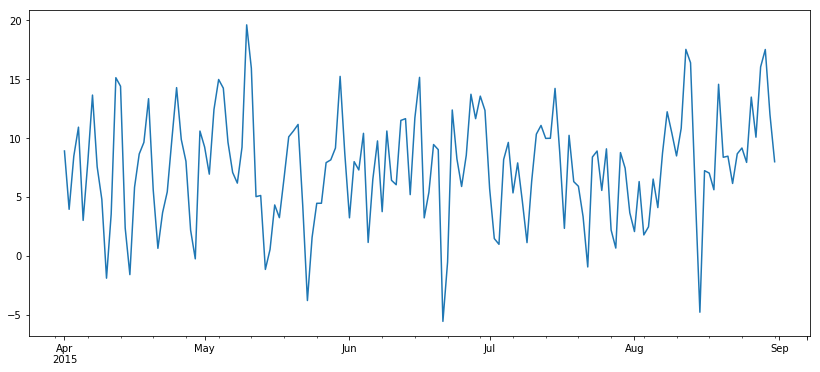

In [27]:
# Plot the time series
ma_ts.plot(figsize=(14,6))

## Look at the ACF and PACF of your model and write down your conclusions

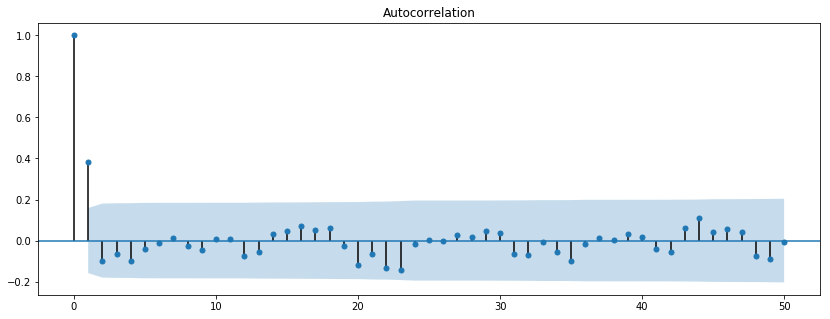

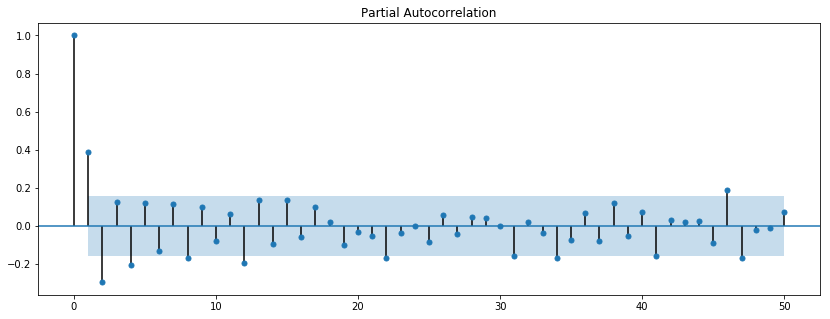

In [28]:
# plots here
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_acf(ma_ts, lags=50);
plot_pacf(ma_ts, lags=50);

## Check your model with ARMA in statsmodels

Repeat what you did for your AR model but now for your MA model to verify the parameters are estimated correctly.

In [29]:
# assuming your time series are stored in an object "series"
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(ma_ts, order=(0,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                   data   No. Observations:                  153
Model:                     ARMA(0, 1)   Log Likelihood                -425.916
Method:                       css-mle   S.D. of innovations              3.897
Date:                Sun, 16 Jun 2019   AIC                            857.832
Time:                        22:37:44   BIC                            866.924
Sample:                    04-01-2015   HQIC                           861.525
                         - 08-31-2015                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5167      0.589     12.763      0.000       6.362       8.671
ma.L1.data     0.8753      0.050     17.634      0.000       0.778       0.973
                                    Roots           

## Create a model for the 400m data set

Import the data set containing the historical running times for the men's 400m on the Olympic games.

In [31]:
# the data is in "winning_400m.csv"
olympic_ts = pd.read_csv('winning_400m.csv')
olympic_ts.year = pd.to_datetime(olympic_ts.year, format='%Y')
olympic_ts.set_index('year', inplace=True)
olympic_ts.head()

,winning_times
year,
1900-01-01,49.4
1904-01-01,49.2
1908-01-01,50.0
1912-01-01,48.2
1920-01-01,49.6


Plot the data

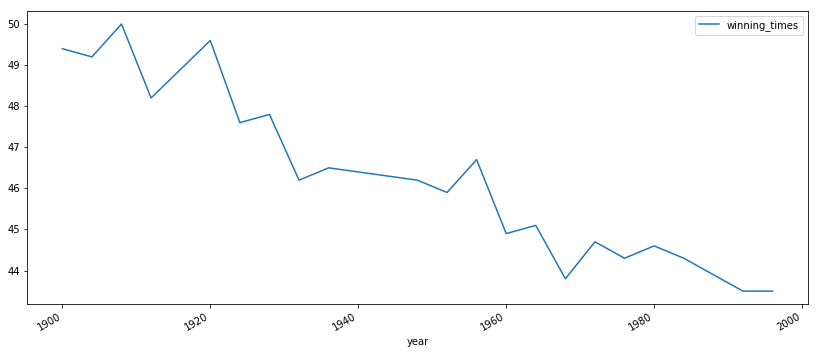

In [32]:
# your code here
olympic_ts.plot(figsize=(14,6))

Difference the data to get a stationary time series. Make sure to remove the first NaN value.

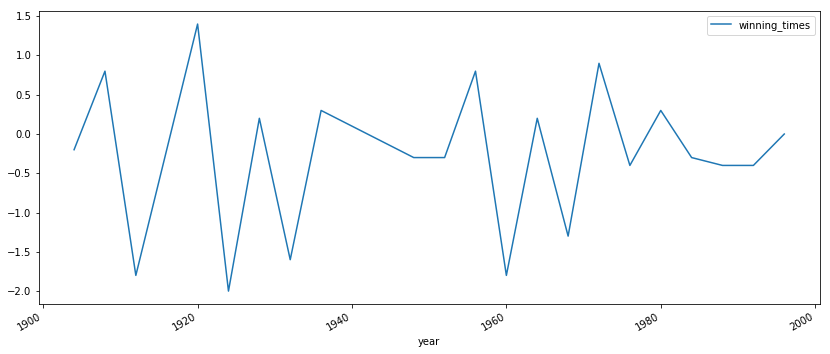

In [57]:
# your code here
olympic_diff = olympic_ts.diff(periods=1)
olympic_diff.dropna(inplace=True)
olympic_diff.plot(figsize=(14,6))

/opt/conda/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


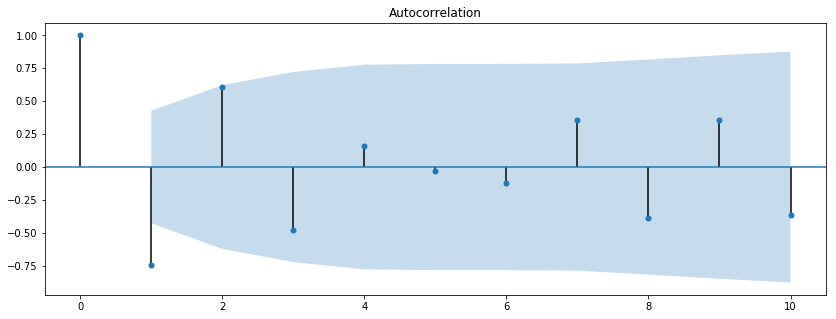

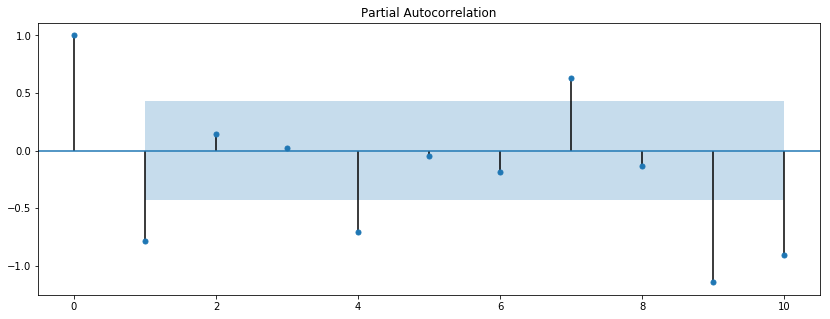

In [58]:
# Look at ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_acf(olympic_diff, lags=10);
plot_pacf(olympic_diff, lags=10);

Based on the ACF and PACF, fit an arma model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates.

In [66]:
# your code here
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Fit ARMA model
mod_arma = ARMA(olympic_diff, order=(2,2))
res_arma = mod_arma.fit()

# print summary
print(res_arma.summary())
print(res_arma.params)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 2)   Log Likelihood                 -16.472
Method:                       css-mle   S.D. of innovations              0.461
Date:                Sun, 16 Jun 2019   AIC                             44.943
Time:                        23:02:16   BIC                             51.210
Sample:                             0   HQIC                            46.303
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2718      0.098     -2.779      0.013      -0.463      -0.080
ar.L1.winning_times    -1.7575      0.097    -18.070      0.000      -1.948      -1.567
ar.L2.winning_ti

In [64]:
# Try another one
# Fit ARMA model
mod_arma = ARMA(olympic_diff, order=(2,1))
res_arma = mod_arma.fit()

# print summary
print(res_arma.summary())
print(res_arma.params)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 1)   Log Likelihood                 -18.955
Method:                       css-mle   S.D. of innovations              0.562
Date:                Sun, 16 Jun 2019   AIC                             47.911
Time:                        23:00:39   BIC                             53.133
Sample:                             0   HQIC                            49.044
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2916      0.073     -4.018      0.001      -0.434      -0.149
ar.L1.winning_times    -1.6827      0.119    -14.199      0.000      -1.915      -1.450
ar.L2.winning_ti

In [65]:
# Fit ARMA model
mod_arma = ARMA(olympic_diff, order=(1,0))
res_arma = mod_arma.fit()

# print summary
print(res_arma.summary())
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 0)   Log Likelihood                 -20.054
Method:                       css-mle   S.D. of innovations              0.618
Date:                Sun, 16 Jun 2019   AIC                             46.107
Time:                        23:01:16   BIC                             49.241
Sample:                             0   HQIC                            46.787
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2885      0.080     -3.602      0.002      -0.445      -0.131
ar.L1.winning_times    -0.7186      0.137     -5.262      0.000      -0.986      -0.451
                

/opt/conda/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an erro

## What is your final model? Why did you pick this model?

ARMA(1,0), ARMA(2,2) and ARMA(2,1) all seem to have decent fits with significant parameters. Depending on whether you pick AIC or BIC as a model selection criterion, your result may vary. In this situation, you'd generally go for a model with fewer parameters, so ARMA seems fine. Note that we have a relatively short time series, which can lead to a more difficult model selection process.

## Summary

Great! Now that you know the ins and outs of ARMA models and you've practiced your modeling knowledge.